In [1]:
# Run Initial Preparation Notebook
# Run ML Preparation Notebook
%run app1_cust_seg_ml_prep.ipynb

Total Number of Duplicate Rows: 25876
ArrivalDateMonth: 12 unique values
Meal: 4 unique values
MarketSegment: 7 unique values
DistributionChannel: 4 unique values
ReservedRoomType: 7 unique values
AssignedRoomType: 8 unique values
DepositType: 3 unique values
CustomerType: 4 unique values
ReservationStatus: 3 unique values
['num__IsCanceled' 'num__LeadTime' 'num__ArrivalDateYear'
 'num__ArrivalDateMonth' 'num__ArrivalDateWeekNumber'
 'num__ArrivalDateDayOfMonth' 'num__StaysInWeekendNights'
 'num__StaysInWeekNights' 'num__Adults' 'num__Children' 'num__Babies'
 'num__Meal' 'num__MarketSegment' 'num__DistributionChannel'
 'num__IsRepeatedGuest' 'num__PreviousCancellations'
 'num__PreviousBookingsNotCanceled' 'num__ReservedRoomType'
 'num__AssignedRoomType' 'num__BookingChanges' 'num__DepositType'
 'num__Agent' 'num__Company' 'num__DaysInWaitingList' 'num__CustomerType'
 'num__ADR' 'num__RequiredCarParkingSpaces' 'num__TotalOfSpecialRequests'
 'num__ReservationStatus' 'num__ReservationStat

In [2]:
# Import Libraries
from sklearn.cluster import DBSCAN
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score,
)

from sklearn.model_selection import ParameterGrid

In [3]:
transformed_df  # Ready to Go Data

,num__IsCanceled,num__LeadTime,num__ArrivalDateYear,num__ArrivalDateMonth,num__ArrivalDateWeekNumber,num__ArrivalDateDayOfMonth,num__StaysInWeekendNights,num__StaysInWeekNights,num__Adults,num__Children,num__Babies,num__Meal,num__MarketSegment,num__DistributionChannel,num__IsRepeatedGuest,num__PreviousCancellations,num__PreviousBookingsNotCanceled,num__ReservedRoomType,num__AssignedRoomType,num__BookingChanges,num__DepositType,num__Agent,num__Company,num__DaysInWaitingList,num__CustomerType,num__ADR,num__RequiredCarParkingSpaces,num__TotalOfSpecialRequests,num__ReservationStatus,num__ReservationStatusYear,num__ReservationStatusMonth,num__ReservationStatusDay,num__TotalStay,num__SpendingPerPerson,num__GroupType,num__BookingUrgency,num__HighDemand,num__LoyaltyScore,num__ChildRatio,num__Occupancy,num__WaitingTimeCategory,num__CancellationRisk
0,-0.656114,-0.874411,-1.902984,0.185429,0.027139,-1.676536,-0.962296,-0.170768,-1.646194,-0.298667,-0.071574,1.163539,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.322338,-0.176568,-0.085664,-0.14545,-2.328143,-0.191229,-0.853375,0.573434,-1.879786,0.241861,-1.452015,-0.559220,-2.005682,-1.366705,1.189154,-0.45069,-0.101771,-0.30974,-0.597570,-0.11124,-0.061833
1,1.524125,0.124226,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,0.241861,-1.680519,0.420197,-0.714124,-0.094618,-1.018062,-0.45069,-0.101771,-0.30974,-0.597570,-0.11124,-0.061833
2,1.524125,-0.155879,-1.902984,0.185429,0.027139,-1.676536,-0.962296,1.088495,-1.646194,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.905480,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,1.632780,0.420197,0.290421,-1.366705,-1.018062,-0.45069,-0.101771,-0.30974,-0.989074,-0.11124,-0.061833
3,1.524125,0.172940,-1.902984,0.185429,0.027139,-1.676536,1.248033,1.088495,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,1.545586,-1.527907,-1.879786,-0.069373,0.833018,1.399613,-0.714124,-0.094618,-1.018062,2.21882,-0.101771,-0.30974,-0.858573,-0.11124,-0.061833
4,1.524125,0.270368,-1.902984,0.185429,0.027139,-1.562928,-0.962296,-0.170768,0.220775,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,-0.727647,-0.191229,0.346106,-1.527907,-1.879786,-0.691841,-1.566267,-0.559220,-0.714124,-0.094618,-1.018062,-0.45069,-0.101771,-0.30974,0.185439,-0.11124,-0.061833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53262,-0.656114,-0.667376,1.131434,0.510832,0.616286,1.618099,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,-0.164441,0.433788,-0.179182,-0.095855,-0.093869,-0.600661,-0.709741,-0.356899,-0.126961,8.356016,-0.176568,-0.085664,-0.14545,-0.316749,-0.191229,-0.853375,0.573434,1.183060,0.864329,-1.109260,1.889321,-0.382540,-0.094618,1.189154,-0.45069,-0.101771,-0.30974,-0.933145,-0.11124,-0.061833
53263,-0.656114,0.294725,1.131434,0.510832,0.616286,1.731707,1.248033,1.718127,2.087745,-0.298667,-0.071574,-0.534495,0.601096,0.433788,-0.179182,-0.095855,-0.093869,1.923134,1.616124,-0.356899,-0.126961,-0.255237,-0.176568,-0.085664,-0.14545,2.388193,-0.191229,1.545586,0.573434,1.183060,0.864329,-0.995009,1.889321,0.531624,2.449557,-1.018062,2.21882,-0.101771,-0.30974,-0.709428,-0.11124,-0.061833
53264,-0.656114,-0.533413,1.131434,0.510832,0.616286,1.731707,1.248033,1.718127,0.220775,-0.298667,-0.071574,-0.534495,0.601096

In [4]:
param_grid = {
    'eps': [0.5, 1.0, 1.5, 2.0, 3.0, 5.0],  
    # 'min_samples': [5, 10, 20]  
}

best_score = -1
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    dbscan = DBSCAN(eps=params['eps'], min_samples=50)
    labels = dbscan.fit_predict(transformed_df)
    
    filtered_data = transformed_df[labels != -1]
    filtered_labels = labels[labels != -1]
    
    if len(set(filtered_labels)) > 1:  # If there are at least two clusters
        sil_score = silhouette_score(filtered_data, filtered_labels)
        if sil_score > best_score:
            best_score = sil_score
            best_params = params
            best_model = dbscan

print(f"Best Parameters: {best_params}, Silhouette Score: {best_score}")


Best Parameters: {'eps': 5.0}, Silhouette Score: 0.19324019517426927


In [5]:
# Performance evaluation with the best model
final_labels = best_model.fit_predict(transformed_df)

# Performance metrics
filtered_data = transformed_df[final_labels != -1]
filtered_labels = final_labels[final_labels != -1]

In [6]:
# Examining cluster sizes
from collections import Counter

cluster_counts = Counter(final_labels)
print(f"Cluster Sizes: {cluster_counts}")

Cluster Sizes: Counter({np.int64(0): 47795, np.int64(-1): 1815, np.int64(1): 1506, np.int64(6): 949, np.int64(2): 447, np.int64(3): 290, np.int64(8): 124, np.int64(9): 111, np.int64(7): 97, np.int64(4): 82, np.int64(5): 51})


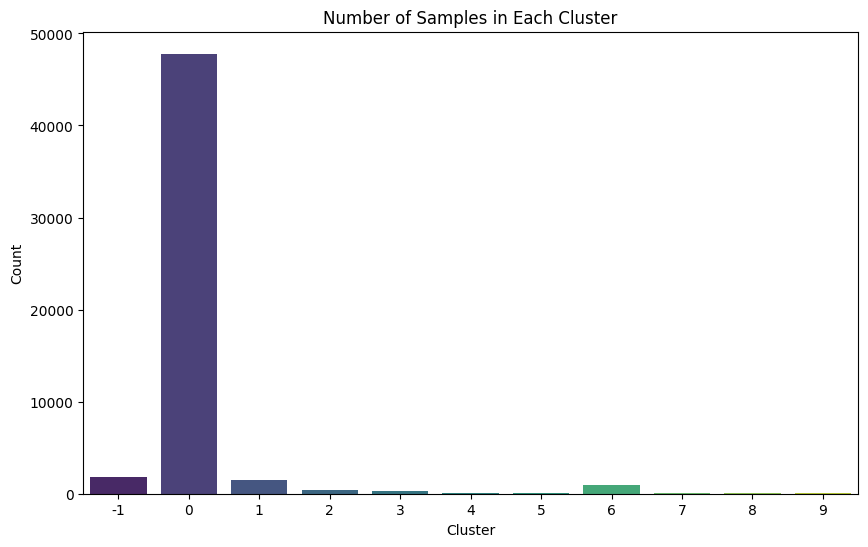

In [7]:
# Countplot for visualizing the number of samples in each cluster
import matplotlib.pyplot as plt
import seaborn as sns

# Add Clusters to the Dataset
transformed_df["Cluster"] = final_labels

plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=transformed_df, palette='viridis')
plt.title('Number of Samples in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

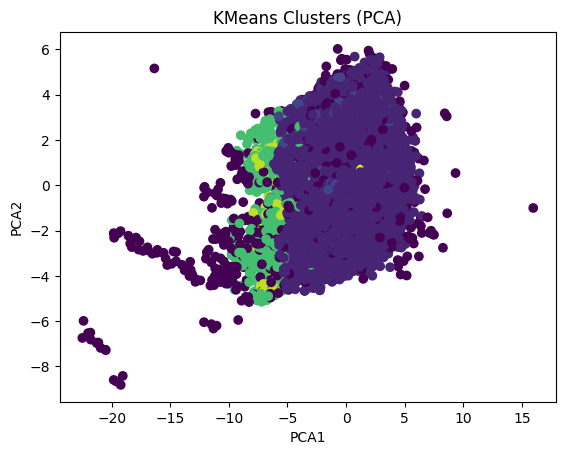

In [8]:
from sklearn.decomposition import PCA

# Dimensionally Reduction with PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(transformed_df.drop('Cluster', axis=1))

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=final_labels, cmap='viridis')
plt.title('KMeans Clusters (PCA)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [11]:
# Calculate silhouette score
silhouette_avg = silhouette_score(transformed_df.drop('Cluster', axis=1), final_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Calculate Davies-Bouldin score
davies_bouldin_avg = davies_bouldin_score(transformed_df.drop('Cluster', axis=1), final_labels)
print(f'Davies-Bouldin Score: {davies_bouldin_avg}')

# Calculate Calinski-Harabasz score
calinski_harabasz_avg = calinski_harabasz_score(transformed_df.drop('Cluster', axis=1), final_labels)
print(f'Calinski-Harabasz Score: {calinski_harabasz_avg}')

# Calculate noise ratio (assuming noise points are labeled as -1)
noise_ratio = (final_labels == -1).sum() / len(final_labels)
print(f'Noise Ratio: {noise_ratio}')

Silhouette Score: 0.17333486598481088
Davies-Bouldin Score: 2.178016682419587
Calinski-Harabasz Score: 801.3785814192038
Noise Ratio: 0.03407362907616348


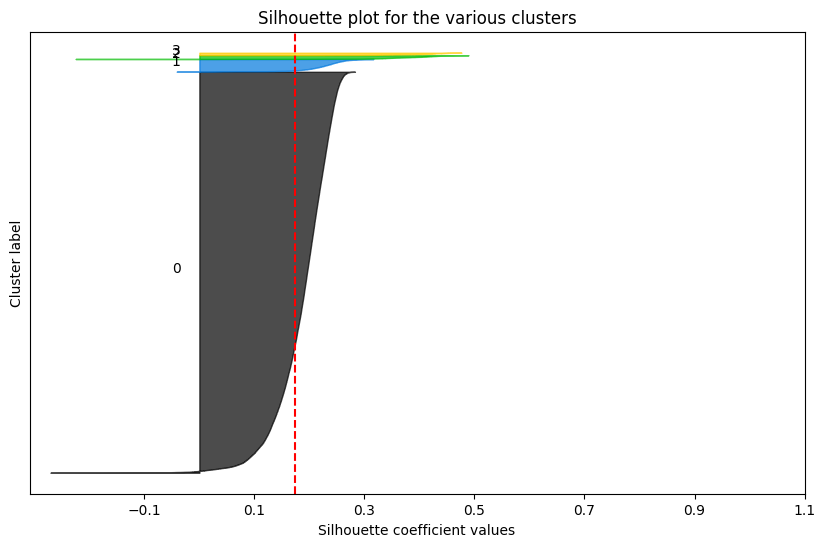

In [12]:
from sklearn.metrics import silhouette_samples
import numpy as np

# Silhouette scores for each sample
sample_silhouette_values = silhouette_samples(transformed_df.drop('Cluster', axis=1), final_labels)

# Plotting silhouette diagram
fig, ax = plt.subplots(figsize=(10, 6))
y_lower = 10
for i in range(4):  # Number of clusters
    ith_cluster_silhouette_values = sample_silhouette_values[final_labels == i]
    ith_cluster_silhouette_values.sort()
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = plt.cm.nipy_spectral(float(i) / 4)
    ax.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
    ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10

ax.set_title("Silhouette plot for the various clusters")
ax.set_xlabel("Silhouette coefficient values")
ax.set_ylabel("Cluster label")
ax.axvline(x=silhouette_avg, color="red", linestyle="--")
ax.set_yticks([])
ax.set_xticks(np.arange(-0.1, 1.1, 0.2))
plt.show()